In [8]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

In [10]:
import pandas as pd
import plotly.express as px

In [12]:
# Get fips codes
df_fips = pd.read_csv("csv/ca_fips.csv", dtype={"fips": str})
df_fips = df_fips.drop(columns="county")

In [98]:
# County
df_electricity_by_county = pd.read_csv("csv/ElectricityByCounty.csv")[['County','Sector','2018']]
df_electricity_by_county = pd.concat([df_fips,df_electricity_by_county], axis=1)
df_electricity_by_county

,fips,County,Sector,2018
0,06001,ALAMEDA,Residential,2951.870114
1,06003,ALPINE,Residential,9.420910
2,06005,AMADOR,Residential,137.506340
3,06007,BUTTE,Residential,722.508276
4,06009,CALAVERAS,Residential,202.779767
5,06011,COLUSA,Residential,65.824078
6,06013,CONTRA COSTA,Residential,2814.796953
7,06015,DEL NORTE,Residential,113.694574
8,06017,EL DORADO,Residential,748.960579
9,06019,FRESNO,Residential,2744.267090


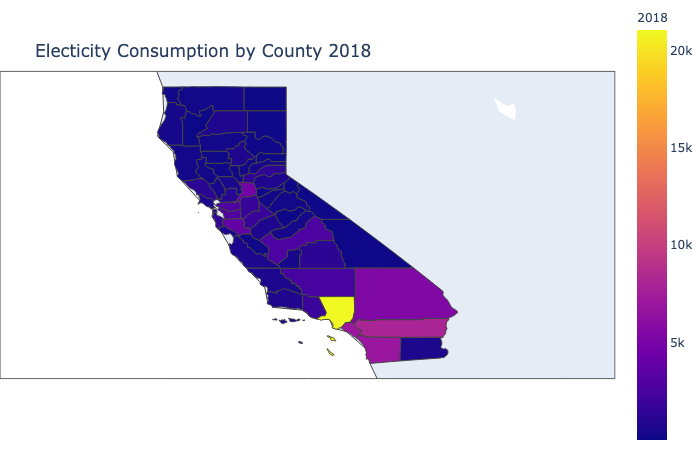

In [97]:
title = "Electicity Consumption by County 2018"
fig = px.choropleth(
    df_electricity_by_county,
    geojson=counties,
    locations='fips',
    color='2018',
    hover_name="County",
    title=title
)
fig.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    hoverlabel=dict(
        bgcolor='#00bfff', 
        font_size=16, 
        font_family="Rockwell",
    ),
    title={'y':.9}
)
fig.update_geos(fitbounds="locations")
fig.show("png")

In [85]:
# Per person
df_population_by_county = pd.read_csv("csv/ca_population_2016-2018.csv")[['County','Pop_2018']]
df_population_by_county = pd.concat([df_fips,df_population_by_county], axis=1)
df_population_by_county['electricity_per_person_2018'] = df_electricity_by_county['2018'] / df_population_by_county['Pop_2018']
df_population_by_county

,fips,County,Pop_2018,electricity_per_person_2018
0,06001,Alameda,1666753,0.001771
1,06003,Alpine,1101,0.008557
2,06005,Amador,39383,0.003492
3,06007,Butte,231256,0.003124
4,06009,Calaveras,45602,0.004447
5,06011,Colusa,21627,0.003044
6,06013,Contra Costa,1150215,0.002447
7,06015,Del Norte,27828,0.004086
8,06017,El Dorado,190678,0.003928
9,06019,Fresno,994400,0.002760


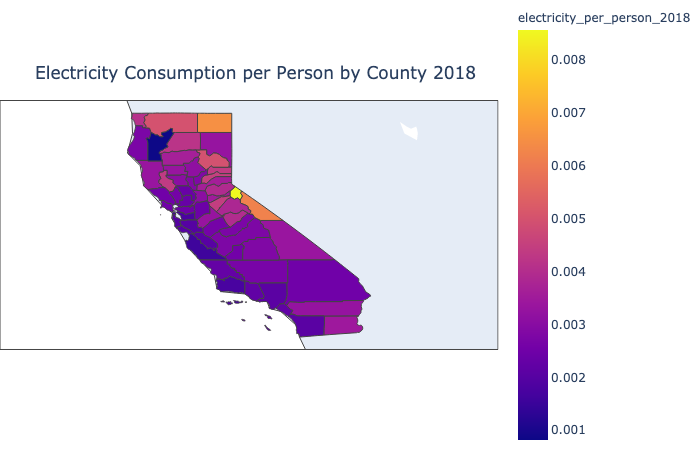

In [86]:
title = "Electricity Consumption per Person by County 2018"
fig_per_person = px.choropleth(
    df_population_by_county,
    geojson=counties,
    locations='fips',
    color='electricity_per_person_2018',
    hover_name="County",
    title=title
)
fig_per_person.update_layout(
    margin={"r":0,"t":0,"l":0,"b":0},
    hoverlabel=dict(
        bgcolor='#00bfff', 
        font_size=16, 
        font_family="Rockwell",
    ),
    title={'y':.85}
)
fig_per_person.update_geos(fitbounds="locations")
fig_per_person.show("png")

In [99]:
df_electricity_by_county_sorted = df_electricity_by_county.sort_values(by="2018", ascending=False)

In [100]:
top_10 = df_electricity_by_county_sorted.iloc[:10,:]
remainder = df_electricity_by_county_sorted.iloc[10:,:]
top_10

,fips,County,Sector,2018
18,06037,LOS ANGELES,Residential,21044.973883
32,06065,RIVERSIDE,Residential,7960.740053
29,06059,ORANGE,Residential,7035.763296
36,06073,SAN DIEGO,Residential,6942.482091
35,06071,SAN BERNARDINO,Residential,5443.731723
33,06067,SACRAMENTO,Residential,4713.027288
42,06085,SANTA CLARA,Residential,3860.162566
0,06001,ALAMEDA,Residential,2951.870114
6,06013,CONTRA COSTA,Residential,2814.796953
9,06019,FRESNO,Residential,2744.267090


In [90]:
remainder_sum = remainder['2018'].sum()

In [75]:
import numpy as np
data={'fips':[np.nan],'County':['Remainder'],'2018':[remainder_sum]}
df_remainder_sum = pd.DataFrame(data=data)
top_10_and_remainder = top_10.append(df_remainder_sum)

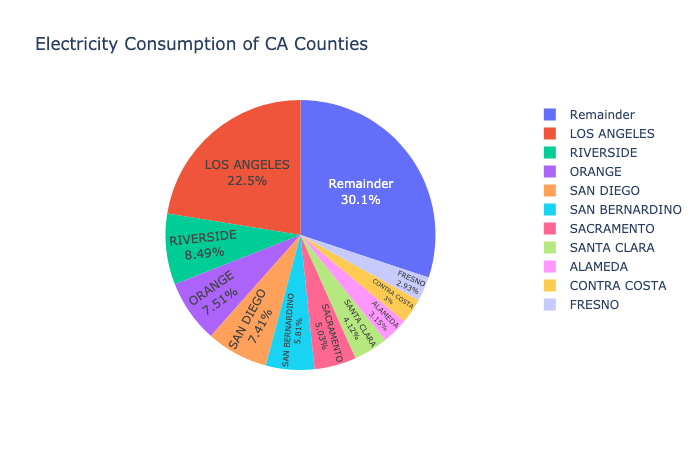

In [91]:
title = 'Electricity Consumption of CA Counties'
fig_pie = px.pie(top_10_and_remainder, values='2018', names='County', title=title)
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.show("png")

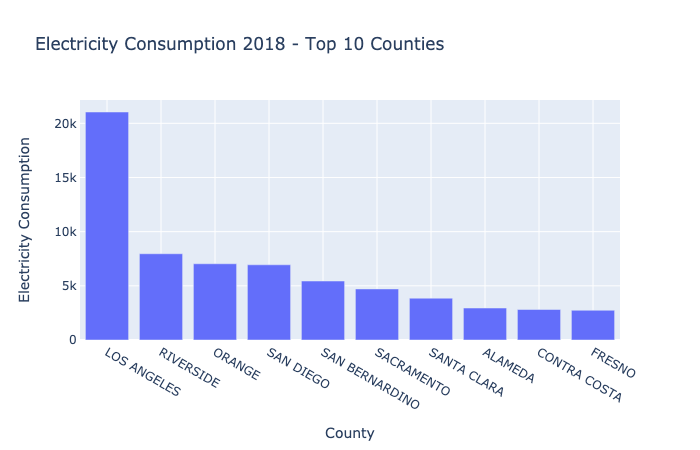

In [92]:
title = "Electricity Consumption 2018 - Top 10 Counties"
labels={"2018": "Electricity Consumption"}
fig_bar = px.bar(top_10, x='County', y='2018', title=title, labels=labels)
fig_bar.show("png")

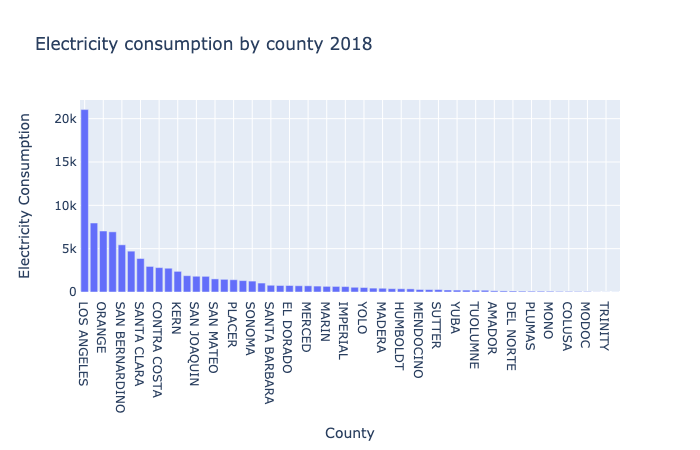

In [101]:
title = "Electricity consumption by county 2018"
labels={"2018": "Electricity Consumption"}
fig_bar_all = px.bar(df_electricity_by_county_sorted, x='County', y='2018', title=title, labels=labels)
fig_bar_all.update_layout(hovermode="x unified")
fig_bar_all.show("png")

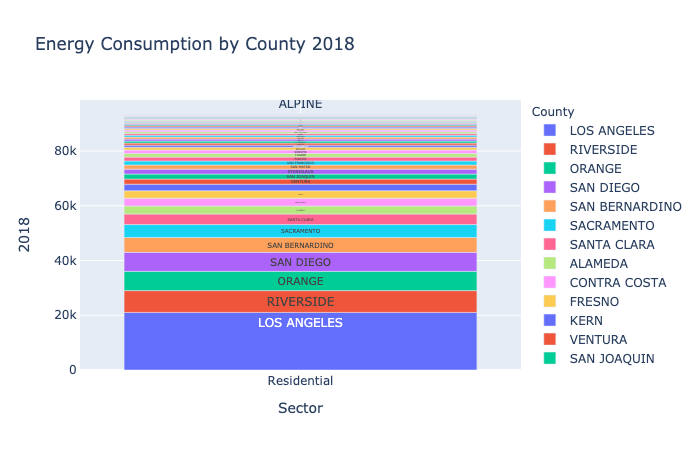

In [102]:
fig_stacked_bar = px.bar(df_electricity_by_county_sorted, x="Sector", y="2018", color="County", text="County", title="Energy Consumption by County 2018")
fig_stacked_bar.show("png")

In [103]:
import chart_studio.plotly as py
py.iplot(fig_stacked_bar, filename='Energy Consumption Stacked Bar', sharing='public')